In [1]:
# Dinga Madalina (s1033146)
# Vahdad Alireza (S1015567)

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def load_outputs():
    # Open and read the “output_data” Matlab file, containing the output bytes
    outputs = scipy.io.loadmat(r'.\data1\output_data.mat')

    # Get outputs as numpy array
    outputs = outputs['output_data']

    return outputs

#### Traces/ measurement matrix: No_inputs X No_samples

In [2]:
def load_traces():
    # Open and read the “hardware_traces” Matlab file, containing the traceset (10k traces, 2k samples each)
    traces = scipy.io.loadmat(r'.\data1\hardware_traces.mat')
    
    traces = traces['traces']
    
    return traces

In [3]:
# Read data
outputs = load_outputs()
traces = load_traces()

# 10k 8-bit outputs used in the attack 
no_outputs = np.shape(outputs)[0]

# 10k traces of 2k time samples each
no_traces = np.shape(traces)[0]

assert(no_traces == no_outputs)
assert(no_outputs == 10000)
assert(np.shape(traces) == (10000, 2000))

In [4]:
def plot_1st_trace():
    plt.plot(traces[0])
    plt.title("Representation of the 1st trace in time")
    plt.xlabel("Power consumption")
    plt.ylabel("Time")
    plt.show()

The encryption algorithm used is AES-128 (10 rounds for 128-bit keys)

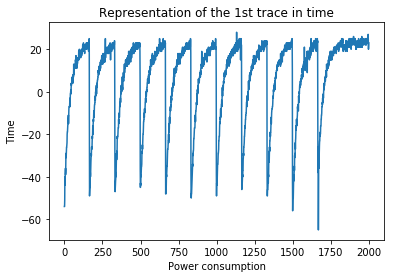

In [5]:
plot_1st_trace()

Invert the S-Box in order to create predictions about the input value Sin.

In [7]:
# Takes a 8-bit value of output and a 8-bit value of the hypothetical key
# Returns the output of the inverted S-Box

def inverted_SBox(out_val, key):
    return inv_sbox[out_val ^ key]

In [9]:
inv_sbox= (0x52 ,0x09 ,0x6a ,0xd5 ,0x30 ,0x36 ,0xa5 ,0x38 ,0xbf ,0x40 ,0xa3 ,0x9e ,0x81 ,0xf3 ,0xd7 ,0xfb
 ,0x7c ,0xe3 ,0x39 ,0x82 ,0x9b ,0x2f ,0xff ,0x87 ,0x34 ,0x8e ,0x43 ,0x44 ,0xc4 ,0xde ,0xe9 ,0xcb
 ,0x54 ,0x7b ,0x94 ,0x32 ,0xa6 ,0xc2 ,0x23 ,0x3d ,0xee ,0x4c ,0x95 ,0x0b ,0x42 ,0xfa ,0xc3 ,0x4e
 ,0x08 ,0x2e ,0xa1 ,0x66 ,0x28 ,0xd9 ,0x24 ,0xb2 ,0x76 ,0x5b ,0xa2 ,0x49 ,0x6d ,0x8b ,0xd1 ,0x25
 ,0x72 ,0xf8 ,0xf6 ,0x64 ,0x86 ,0x68 ,0x98 ,0x16 ,0xd4 ,0xa4 ,0x5c ,0xcc ,0x5d ,0x65 ,0xb6 ,0x92
 ,0x6c ,0x70 ,0x48 ,0x50 ,0xfd ,0xed ,0xb9 ,0xda ,0x5e ,0x15 ,0x46 ,0x57 ,0xa7 ,0x8d ,0x9d ,0x84
 ,0x90 ,0xd8 ,0xab ,0x00 ,0x8c ,0xbc ,0xd3 ,0x0a ,0xf7 ,0xe4 ,0x58 ,0x05 ,0xb8 ,0xb3 ,0x45 ,0x06
 ,0xd0 ,0x2c ,0x1e ,0x8f ,0xca ,0x3f ,0x0f ,0x02 ,0xc1 ,0xaf ,0xbd ,0x03 ,0x01 ,0x13 ,0x8a ,0x6b
 ,0x3a ,0x91 ,0x11 ,0x41 ,0x4f ,0x67 ,0xdc ,0xea ,0x97 ,0xf2 ,0xcf ,0xce ,0xf0 ,0xb4 ,0xe6 ,0x73
 ,0x96 ,0xac ,0x74 ,0x22 ,0xe7 ,0xad ,0x35 ,0x85 ,0xe2 ,0xf9 ,0x37 ,0xe8 ,0x1c ,0x75 ,0xdf ,0x6e
 ,0x47 ,0xf1 ,0x1a ,0x71 ,0x1d ,0x29 ,0xc5 ,0x89 ,0x6f ,0xb7 ,0x62 ,0x0e ,0xaa ,0x18 ,0xbe ,0x1b
 ,0xfc ,0x56 ,0x3e ,0x4b ,0xc6 ,0xd2 ,0x79 ,0x20 ,0x9a ,0xdb ,0xc0 ,0xfe ,0x78 ,0xcd ,0x5a ,0xf4
 ,0x1f ,0xdd ,0xa8 ,0x33 ,0x88 ,0x07 ,0xc7 ,0x31 ,0xb1 ,0x12 ,0x10 ,0x59 ,0x27 ,0x80 ,0xec ,0x5f
 ,0x60 ,0x51 ,0x7f ,0xa9 ,0x19 ,0xb5 ,0x4a ,0x0d ,0x2d ,0xe5 ,0x7a ,0x9f ,0x93 ,0xc9 ,0x9c ,0xef
 ,0xa0 ,0xe0 ,0x3b ,0x4d ,0xae ,0x2a ,0xf5 ,0xb0 ,0xc8 ,0xeb ,0xbb ,0x3c ,0x83 ,0x53 ,0x99 ,0x61
 ,0x17 ,0x2b ,0x04 ,0x7e ,0xba ,0x77 ,0xd6 ,0x26 ,0xe1 ,0x69 ,0x14 ,0x63 ,0x55 ,0x21 ,0x0c ,0x7d);

Calculate the Hamming weight of the guess.
Convert every possible value 0-16 to binary and count the 1s.
Store in HammingWeight look-up table.

In [10]:
HammingWeight = [bin(n).count('1') for n in range(0,256)]

Calculate the Hamming distance of two byte inputs, which is the number of positions at which we have different bits.
To achieve this perform their XOR operation, (a ^ b), and then count the total number of 1s in the result.

We will calculate the Hamming distance between the old and the new register state (i.e., the number of bit flips caused when the old register state gets updated with the new register state).

In [11]:
def HammingDistance(a, b):
    hd = HammingWeight[a ^ b]
    
    return hd

#### Construct the power-prediction matrix (hypothetical power consumption), by applying Hemming Weight to the value-prediction matrix values. 
Value-prediction matrix on variable y: No_inputs X No_keys.
Save the hypothetical values for each associated plaintext (input) with each possible guess (16 guesses in total).

In [12]:
def get_power_prediction_matrix(no_outputs, outputs):
    # Initialize power prediction matrix
    power_pred = np.zeros(shape=(no_outputs, 256))

    for i in range(no_outputs):
        for key in range(0, 256):
            predicted_in = inverted_SBox(outputs[i][0], key)
            power_pred[i][key] = HammingDistance(predicted_in, outputs[i][0])

    np.shape(power_pred)  
    
    return power_pred

In [13]:
power_pred = get_power_prediction_matrix(no_outputs, outputs)

In [14]:
power_pred

array([[6., 5., 3., ..., 3., 7., 5.],
       [6., 3., 4., ..., 3., 5., 2.],
       [4., 4., 6., ..., 5., 4., 3.],
       ...,
       [2., 3., 5., ..., 5., 4., 5.],
       [6., 2., 0., ..., 2., 3., 3.],
       [4., 5., 2., ..., 4., 3., 3.]])

#### For all possible k candidates, compute the column-wise correlation between the traces matrix and the power-prediction matrix. Every guess will be compared to all traces.
#### Pearson Correlation Formula:
$ r = \frac{{}\sum_{i=1}^{n} (h_i - \overline{h})(t_i - \overline{t})}
{\sqrt{\sum_{i=1}^{n} (h_i - \overline{t})^2(t_i - \overline{t})^2}} $

Where: 
    <ul>
    <li> i - i iterates over the traces </li>
    <li> h - hypothetical values (from power prediction matrix) </li>
    <li> t - trace values (traces/ measurement matrix) </li>
    </ul>

We will use numpy.corrcoef to obtain the Pearson correlation coefficients.
Ref: https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

In [15]:
def correlate_traces_with_hypotheses(traces, power_pred):
    no_col_traces = np.shape(traces)[1]
    no_col_power_pred = 256 # 256 key guesses (0..255)
    
    correlation = np.zeros(shape=(no_col_power_pred, no_col_traces))
    
    # Compute correlation between columns
    for power_pred_col in range(no_col_power_pred): # hypothetical values for the guess keys
        for traces_col in range(no_col_traces): # real values
            correlation[power_pred_col, traces_col] = np.corrcoef(power_pred[:,power_pred_col], traces[:,traces_col], rowvar=1)[0][1]
            
    return correlation   

In [16]:
# traces 10k X 2k
np.shape(traces)
# power_pred 10k X 256
np.shape(power_pred)

# absolute candidates 256 X 2k
abs_candidates = abs(correlate_traces_with_hypotheses(traces, power_pred))

In [17]:
abs_candidates

array([[0.00056536, 0.00056536, 0.01773906, ..., 0.00146137, 0.01173987,
        0.00306712],
       [0.0022185 , 0.0022185 , 0.00576695, ..., 0.0083649 , 0.00089003,
        0.00571096],
       [0.00506797, 0.00506797, 0.00084389, ..., 0.0033969 , 0.00324949,
        0.01041418],
       ...,
       [0.0026269 , 0.0026269 , 0.00179821, ..., 0.00840452, 0.00543519,
        0.00217057],
       [0.00272805, 0.00272805, 0.00452008, ..., 0.00051659, 0.0120217 ,
        0.00507977],
       [0.00993921, 0.00993921, 0.00924245, ..., 0.01027903, 0.00525836,
        0.00775601]])

In [18]:
def get_top_candidate(candidates):       
    # The top candidate will be chosen based on absolute correlation.
    # The highest correlation reveals the actual KEY.
    candidates_max = np.zeros(256)
    
    # Only store the maximum cpa across all points in the trace 256 X 1
    for i in range(256):
        candidates_max[i] = max(candidates[i])
        
    # Rank the key candidates from best to worst, based on the absolute value of the correlation function.
    print('Top candidates: ', candidates_max.argsort()[::-1][:])
    
    # The highest correlation value reveals the key
    top_candidate_row = np.argmax(candidates_max)
    
    return top_candidate_row

In [19]:
top_candidate = get_top_candidate(abs_candidates)

Top candidates:  [ 71  90 216 137  58   9 169 119 177  56  98 120 244  37 193   6 173 197
  15 162  24  64 190 254  28 200 136 111 240  74 145 158 204 134 205  97
 124 237 129   0 201  12  42  80 234 178  91 194 184 117 155 167  20  93
 153 112 144  99 131 116  13  40 217 218  79 215 168  92  36 171 220 108
 196 142  84 192  35  95 191  27 252  78  38 109 236  47 253  67 208  51
 106 226  82 154  59  69  23 122 113 222  85  39   8  87 123  14 248 230
  66 203  81 175 213 223 179  17 242 164 182 202 128   5   7 107 221  72
 146 209   2  34 103 170 232 245 140  53 195 135  21 231 227 165  88  32
 255  86 211 249 105 214  11 156 224 238  65 241 166 243 250 206 225  31
 150  55 138  44  19  29  61 151 228 233 198 207 147 163 251 118 126  49
 125 186  30 101 172 127  52   4 183 141  96 174   1 229 157  50  76 235
  77  73  83 185 100   3 187 212 176  60 121 130 159 210  75 148 160 199
 247 149 133  63 181  70  41 143 161 152  62  57  10 115 219  43  54 104
  22 132  89 246  25  48  46 239  

In [20]:
print("Key number", top_candidate, "is the top candidate.")

Key number 71 is the top candidate.


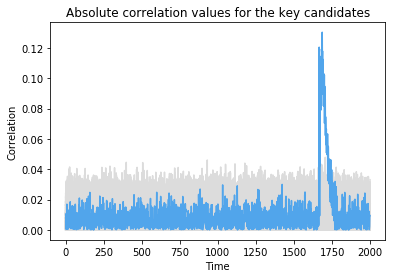

In [21]:
# For every time sample, plot the absolute correlation value for every k candidate
plt.figure()

for i in range(np.shape(abs_candidates)[0]): # 256 candidate keys
        if (i == top_candidate):
            plt.plot(abs_candidates[i], color= '#51A5EB', zorder=2)
        else:
            plt.plot(abs_candidates[i], color = '#DCDCDC', zorder=1)
        
plt.title("Absolute correlation values for the key candidates")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.show()

In [22]:
def get_top_candidate_ranking(candidates):       
    # The top candidate will be chosen based on absolute correlation.
    # The highest correlation reveals the actual KEY.
    candidates_max = np.zeros(256)
    
    # Only store the maximum cpa across all points in the trace 256 X 1
    for i in range(256):
        candidates_max[i] = max(candidates[i])
        
    # Rank the key candidates from best to worst, based on the absolute value of the correlation function.
    best_to_worse = candidates_max.argsort()[::-1][:]
    print('Top candidates: ', best_to_worse)
    
    # ranking between 1 and 256 (add 1 to the position of the best candidate)
    top_candidate_ranking = np.where(best_to_worse == 6)[0] + 1 
    
    return top_candidate_ranking

In [23]:
def run_attack(no_inputs, inputs, traces):
    # Keep only the first no_inputs traces
    traces = traces[:no_inputs]
    
    power_pred = get_power_prediction_matrix(no_inputs)
    
    # absolute candidates 256 X 2k
    abs_candidates = abs(correlate_traces_with_hypotheses(traces, power_pred))
    
    top_candidate_ranking = get_top_candidate_ranking(abs_candidates)
    
    return top_candidate_ranking